In [2]:
import matplotlib.pyplot as plt
import numpy as np

Gradient Descent dynamics

In [ ]:
def mean_learning_gd(v, T, eta_D, eta_G, lambda_D = 0,
                     gamma_D = 0, gamma_G = 0, train_gen_every = 1,
                     Nesterov = False, clip_D = np.Infinity):
    dim = np.shape(v)[0]
    T_aug = T * train_gen_every
    w = 1.4 * np.ones((T_aug, dim))
    theta = 1.7 * np.ones((T_aug, dim))
    m_D = 1.4 * np.ones((T_aug, dim))
    m_G = 1.7 * np.ones((T_aug, dim))

    for t in range(1,T_aug):
        # Discriminator
        if Nesterov == True:
            w_ahead = w[t-1] + gamma_D * m_D[t-1]
        else:
            w_ahead = w[t-1]
        m_D[t] = gamma_D * m_D[t-1] + eta_D * (v - theta[t-1])\
                    - 2 * eta_D * lambda_D * w_ahead * (1.0 - 1.0/np.linalg.norm(w_ahead))
        w[t] = np.clip(w[t-1] + m_D[t], -clip_D, clip_D)

        # Generator
        if t % train_gen_every == 0:
            m_G[t] = gamma_G * m_G[t-1] - eta_G * (w[t-1]) 
            theta[t] = theta[t-1] - m_G[t]
        else:
            m_G[t] = m_G[t-1]
            theta[t] = theta[t-1]
    
    return w, theta

Stochastic Gradient Descent Dynamics

In [4]:
def mean_learning_stochastic_gd(v, T, eta_D, eta_G, minibatch,
                                train_gen_every=1, clip_D=1):
    dim = np.shape(v)[0]
    # Initialize weights and sample
    w = 1.4 * np.ones((T, dim))
    theta = 1.7 * np.ones((T, dim))
    xs = np.random.multivariate_normal(mean=v, 
                                       cov = np.eye(dim), 
                                       size=(T, minibatch))
    zs = np.random.multivariate_normal(mean=np.zeros(dim),
                                       cov = np.eye(dim),
                                       size=(T, minibatch))

    # Compute average of minibatches
    bxs = np.mean(xs, axis=1)
    bzs = np.mean(zs, axis=1)

    for t in range(1,T):
        w[t] = np.clip(w[t-1] + eta_D * (bxs[t-1] - bzs[t-1] - theta[t-1]),
                         -clip_D, clip_D)
        if t % train_gen_every == 0:
            theta[t] = theta[t-1] + eta_G * (w[t-1])
        else:
            theta[t] = theta[t-1]
    
    return w, theta

Plot functions

In [5]:
# Utility functions
def plot_weights(w_D, v_G):
    plt.figure(figsize = (20,5))
    plt.subplot(1,2,1)
    plt.plot(np.arange(np.shape(w_D)[0]), w_D, label = "Discriminator")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(np.arange(np.shape(w_D)[0]), v_G, label = "Generator")
    plt.legend()
    plt.show()
    
    print("Recovered mean from generator: {}"
          .format(np.mean(v_G, axis = 0)))
    print("Last mean from generator: {}".format(v_G[-1]))

In [6]:
# Parameters of the gaussian distribution to be learned( i.e. the mean of Gaussian)
dim = 2
v = [1, 3]

Wasserstein Loss (assuming we have access in the true expectation)

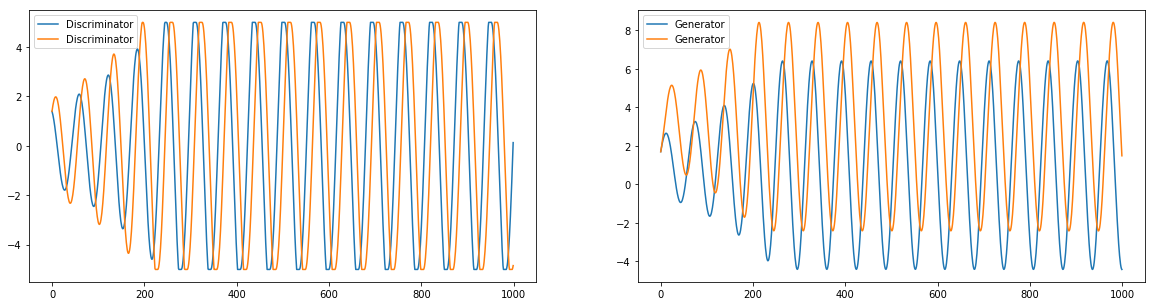

Recovered mean from generator: [1.01242694 3.06896831]
Last mean from generator: [-4.41265013  1.48687931]


In [7]:
# Clip the weights on the expected loss
w, theta = mean_learning_gd(v, 1000, .1, .1,
                            train_gen_every = 1,
                            clip_D = 5)

plot_weights(w, theta)

Gradient descent dynamics with gradient penalty

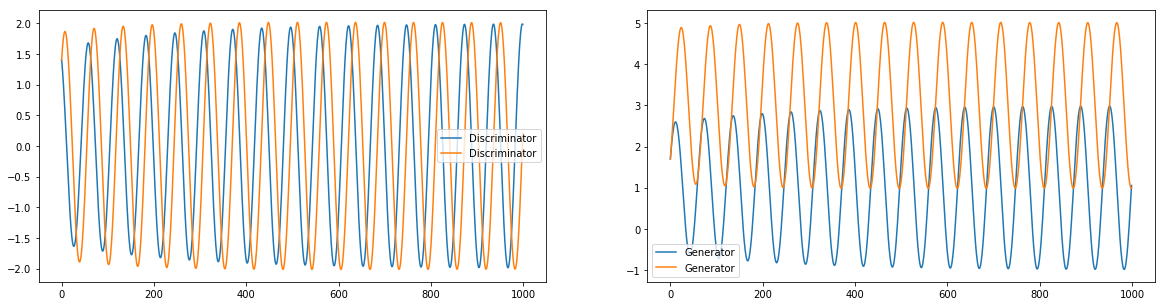

Recovered mean from generator: [0.99461217 3.0108148 ]
Last mean from generator: [1.05461461 0.99370011]


In [8]:
w, theta = mean_learning_gd(v, 1000, .1, .1, lambda_D=.1,
                            train_gen_every = 1)

plot_weights(w, theta)

Gradient descent dynamics with momnentum

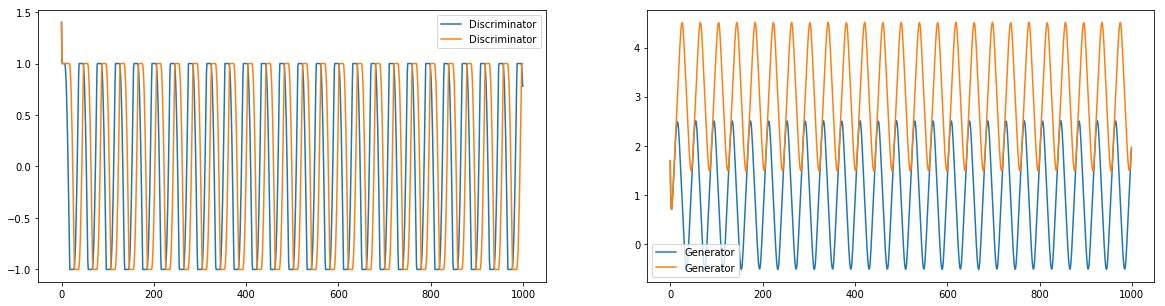

Recovered mean from generator: [1.00250251 2.97992172]
Last mean from generator: [1.95187719 1.97080644]


In [9]:
# GD with Momentum
w, theta = mean_learning_gd(v, 1000, .1, .1, 
                            gamma_D = 0.5, gamma_G = 0.5, train_gen_every = 1, 
                            Nesterov=False, clip_D = 1)

plot_weights(w, theta)

Gradient descent with momentum and gradient penalty

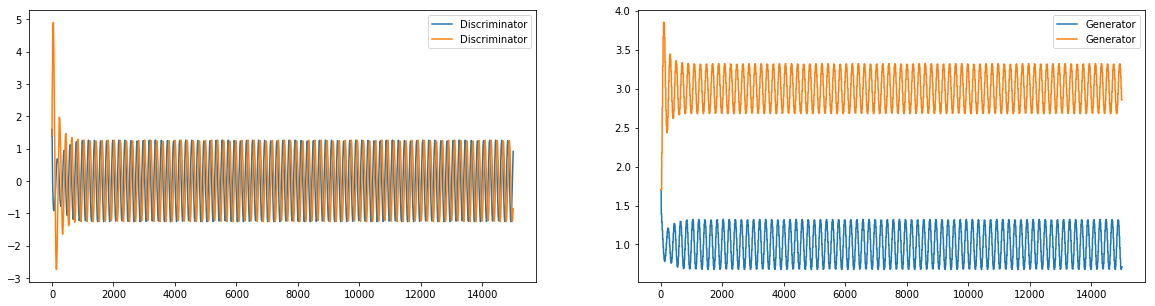

Recovered mean from generator: [1.00067353 2.99916085]
Last mean from generator: [0.71354222 2.85558903]


In [10]:
w, theta = mean_learning_gd(v, 1000, 0.1, 0.1, lambda_D = 0.1, 
                            gamma_D = 0.2, gamma_G = 0.2, train_gen_every = 15)

plot_weights(w, theta)


Gradient descent dynamincs with Nestorov momentum and gradient penalty

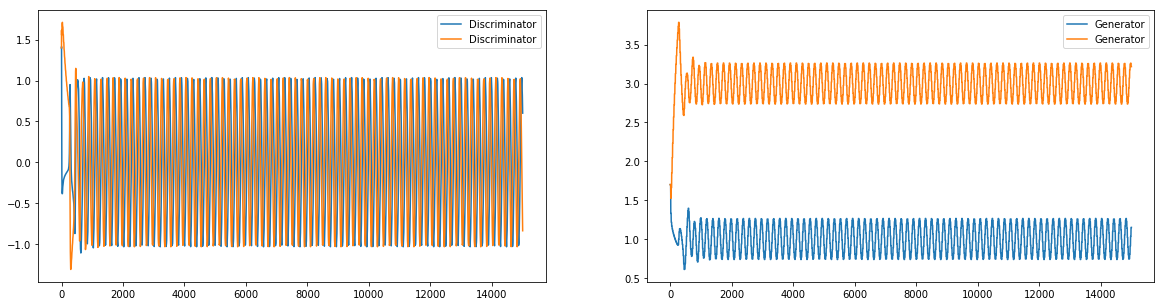

Recovered mean from generator: [1.00078854 2.99613079]
Last mean from generator: [1.1492085  3.21799599]


In [11]:
w, theta = mean_learning_gd(v, 1000, 0.1, 0.1, lambda_D=1,
                            gamma_D = 0.2, gamma_G = 0.2, train_gen_every = 15,
                            Nesterov=True)

plot_weights(w, theta)

Stochastic gradient descent dynamics with minibatching 

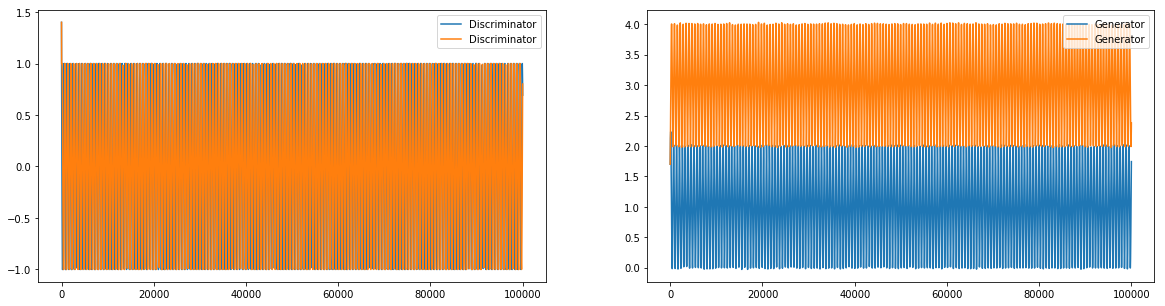

Recovered mean from generator: [1.00045431 2.9994033 ]
Last mean from generator: [1.74362109 2.37788621]


In [12]:
w, theta = mean_learning_stochastic_gd(v, 100000, 0.01, 0.01, 200,
                                       clip_D = 1, train_gen_every = 1)
plot_weights(w, theta)
